<a href="https://colab.research.google.com/github/Dantelarroy/suplements-chatbot/blob/main/Supplements_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Supplements Chatbot**


**Autor**: Dante Larroy  
**Fecha**: 18/12/2024  
**Fecha de Entrega**: 02/01/2025  

Resumen de Fechas:
- EDA y Preprocesamiento de Datos: `18/12 - 21/12`
- Desarrollo del Modelo de Sentimiento: `22/12 - 24/12`
- Desarrollo del Modelo de Clasificación de Tópicos: `26/12 - 28/12`
- Desarrollo de la Función IA Generativa: `29/12 - 31/12`
- Pruebas, Evaluación y Ajustes: `01/01 - 02/01`
- Entrega Final: `2/01/2025`

---

## **`Introducción`**
El objetivo de este desafío es aplicar tus conocimientos en DS e IA
Generativa para diseñar un prototipo funcional, que eventualmente se convierta
en un chatbot capaz de ofrecer soporte a usuarios en base a sus comentarios.
---
## **`Contexto`**
El cliente es una destacada empresa de venta de suplementos nutricionales en
línea.

- **`Problema`** Recientemente, se ha observado un aumento significativo en las reseñas
negativas por parte de los usuarios, algo que anteriormente no sucedía.
Ante esta situación, la empresa busca comprender las causas detrás de esta tendencia.

- **`Solución buscada:`** Analizar los datos disponibles y desarrollar herramientas útiles para abordar el problema.
---
## **`Objetivo`**
Este proyecto tiene como objetivo desarrollar una herramienta que:
1. Analice el sentimiento y clasifique los comentarios de los clientes por temática.
2. Genere respuestas personalizadas basadas en el análisis.  
---
## **`Dataset:`**

- Comentarios de usuarios sobre productos de suplementos nutricionales con etiquetas de sentimientos (positivo, neutral, negativo).
---
## **`Etapas del Proyecto`**
### `EDA`
- Cargar Dataset (Asegurar que se cargue independientemente del lugar de ejecución) ☑
- Revisar calidad de los datos ☑
- Analizar distribución de sentimientos ☑
- Word Cloud ☑
- Complementar con un top de palabras ☑
- Longitud de los comentarios ☑

### `Preprocesamiento y Limpieza de Datos`
- Preprocesar texto:
- Mínusculas ☑
- Eliminar caracteres especiales y puntuación ☑
- Eliminar stopwords ☑
- Lematización ☑
- Tokenización 𐩃
- Gestionar datos desbalanceados si hace falta

### `Feature Engineering`

### `Modelado Predictivo`

  1. `Sentimental Analysis:`(Tenemos el target = Supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podría surgir a la hora de entrenarlo para elegir el algoritmo.

2. `Topic Modeling:` Predecir el tema del que están hablando (No tenemos el target = No supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podría surgir a la hora de entrenarlo para elegir el algoritmo.

3. `Evaluar el Modelo`

### `IA Generativa`

  1. `Generar una funcion` que tenga:
  - Input: Comentario
  - Tareas:
    - Calcular el sentimiento
    - Calcular el tópico
  - Output: Respuesta personalizada de un LLM utilizando esa función
---
## **Recursos adicionales**
Links que pueden ser de útilidad (y que probablemente influyan en su
entregable):
1. https://huggingface.co/intfloat/multilingual-e5-large - Modelo de
Embedding multilenguaje.
2. https://console.groq.com/playground - Plataforma que permite utilizar
LLMs Open Source de manera gratuita a través de una API.

---

## Research Claves por etapas:

- Etapa 1: Modelado Predictivo:
https://huggingface.co/intfloat/multilingual-e5-large - Modelo de Embedding multilenguaje.
  - **1. Sentimental Analysis (Supervisado)**:
    - `Text Preprocesing`: Tokenization. Stop word removal, lemmatization/stemming
    - `Text Vectorization`: TF-IDF, Word Embeddings
    - `Sentimental Analysis`: Elegir y analizar modelo a utilizar
  - **2. Topic Classification (No supervisado)**
    

- Etapa 2: IA Generativa
  - https://console.groq.com/playground - Plataforma que permite utilizar LLMs Open Source de manera gratuita a través de una API.

---

# Configuración del Entorno de Trabajo

## Instalar librerias necesarias

In [138]:
!pip install openpyxl
!pip install nltk


## Importaciones

In [139]:

import os
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




# Descargas
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [140]:
#!git clone https://github.com/Dantelarroy/suplements-chatbot.git

## Cargar el Dataset

In [141]:
# URL del repositorio de Github donde se encuentra el Dataset
url = 'https://github.com/Dantelarroy/suplements-chatbot/raw/main/Dataset.xlsx'

In [142]:
df_supplements = pd.read_excel(url)


In [143]:
df_supplements.head()

,Texto,Sentimiento
0,"El sabor es increíble, lo mejor que he probado",positivo
1,Llegó tarde y el paquete estaba dañado,negativo
2,El precio es razonable para la calidad,positivo
3,No noto diferencia con otros productos similares,neutral
4,El envío fue rápido y sin problemas,positivo


# EDA

Research:
- https://medium.com/dscier/eda-nlp-fe483c6871ba
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://medium.com/@berthelinmargot/eda-and-data-preparation-for-nlp-project-a-hands-on-example-step-by-step-3b95a37318db
- https://medium.com/@KC-James/basic-implementation-of-a-word-cloud-in-python-8b2f9d92d381
- https://medium.com/dscier/eda-nlp-fe483c6871ba

`Información General`
---
- Contiene dos columnas con Dtype: Object
- No hay nulos
- Cantidad de filas (299)

In [144]:
# Veo la información general de las columnas
df_supplements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Texto        299 non-null    object
 1   Sentimiento  299 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


`Nulos`
---

El dataset no presenta valores nulos (lo vi en el código anterior), vuelvo a hacer un check.

In [145]:
# Cuantifico numero total de nulos por columna
df_supplements.isnull().sum()

,0
Texto,0
Sentimiento,0


`Describe:`
---
- No hay nulos (299 valores en ambas columnas)
- En la columna Sentimiento encuentro 3 filas repetidas
- El valor más frecuente es:
  - Texto: "Estoy satisfecho con la calidad del producto". Esto podría ser un buen indicio sobre el producto ofrecido.
  - Sentimiento: Positivo. Confirma que el indicio anterior. Frecuencia positiva más recurrente.

In [146]:
# Resumen estadístico de las columnas
df_supplements.describe()


,Texto,Sentimiento
count,299,299
unique,296,3
top,Estoy satisfecho con la calidad del producto,positivo
freq,2,129


`Distribución de sentimientos`
---


Busco identificar si el datset se encuentra o no desbalanceado.

Identifico una distribución algo desbalanceada con una predominancia de "Positivo" sobre el resto de las categorías.

Como aspecto positivo por otro lado veo que "neutral" y "negativo" tienen una distribución similar entre ellos.

Ultimo aspecto es que "neutral" es el que menor frecuencia tiene. Lo veo natural ya que el cliente suele expresarse cuando algo le disgusta o le gusta.

Riesgos:
- Que el modelo entrenado genere "sesgo" hacia lo positivo.
- Es posible que haya que realizar un ajuste en caso de que eso ocurra.

In [147]:
# Distribución de Sentimientos
distribucion_sentimientos = df_supplements['Sentimiento'].value_counts()
print(distribucion_sentimientos)

Sentimiento
positivo    129
negativo     97
neutral      73
Name: count, dtype: int64


El Dataset tiene una distribución bastante equilibrada entre las clases de sentimientos.

- Desbalance Neutral: Visualizo una menor cantidad de comentarios "Neutrales" lo cuál podría generar un sesgo a la hora de entrenar el modelo.
El chatbot podría no identificar adecuadamente los comentarios neutrales.

- Desbalance Positivo: El modelo podría inclinarse mayoritariamente en predecir Positivos por sobre negativos y neutrales.

Por el momento decido no trabajar este aspecto, ya que no considero que sea significativo.

En caso de que los modelos generen un sesgo trabajaré con herramientas para solucionarlo (imbalanced data tools & oversamplig, undersampling).

- https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696
- https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

<ipython-input-148-5037f801704d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

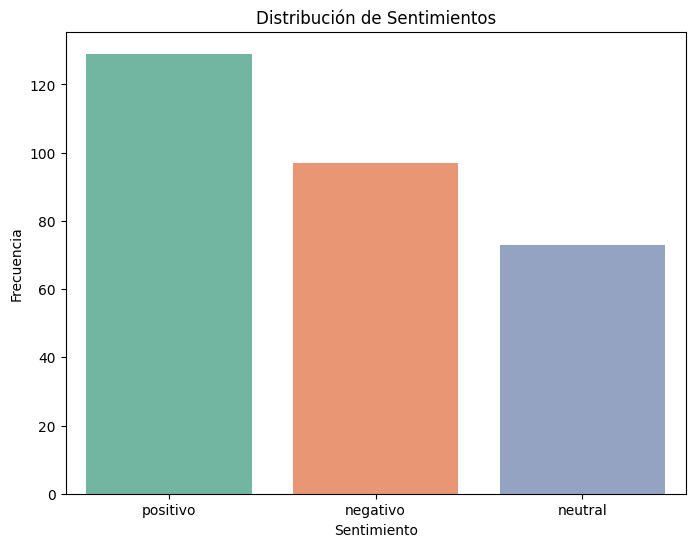

In [148]:
# Grafico la distribución

plt.figure(figsize=(8,6))
sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show


In [149]:
# Revisión de tipo de datos
df_supplements['Texto'] = df_supplements['Texto'].astype(str)
df_supplements['Sentimiento'] = df_supplements['Sentimiento'].astype(str)

`Longitud del "Texto"`
---

Anaalizo la longitud de los comentarios para identificar sobre todo si los comentarios son similares en cuanto a longitud entre los "Positivos" y los "Negativos".

- Detectar patrones en cuánto al detalle de las críticas
- Analizar las criticas cortas o largas en relación al sentimiento de la crítica


count    299.000000
mean       7.053512
std        1.372236
min        3.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       11.000000
Name: longitud_palabras, dtype: float64


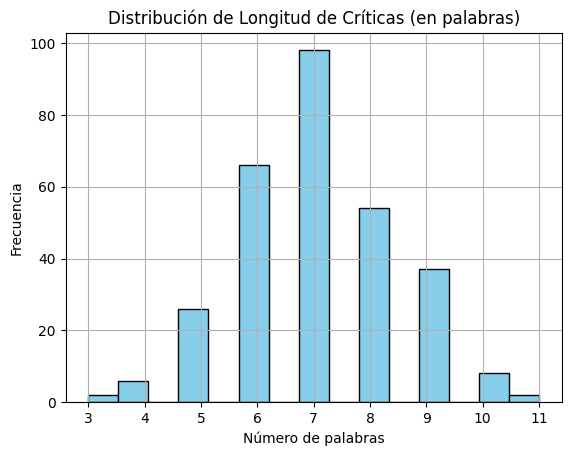

In [150]:
# Función para contar palabras
def contar_palabras(texto):
  return len(texto.split())

# Longitud del texto en palabras
df_supplements["longitud_palabras"] = df_supplements["Texto"].apply(contar_palabras)

# Resumen estadístico
print(df_supplements['longitud_palabras'].describe())

# Gráfico de la distribución de la longitud en palabras
df_supplements['longitud_palabras'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de Longitud de Críticas (en palabras)')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

Identifico que el promedio de palabras por crítica es de 7 palabras.

Ahora voy a desarrollar esto:
- Gráficar el promedio de palabras por crítica de cada tipo de crítica "Negativa", "Positiva" y "Neutra" para buscar patrones.
Ej. Las críticas positivas son mas breves y las negativas son más cortas.
- Analizar las críticas más cortas y más largas en relación al sentimiento

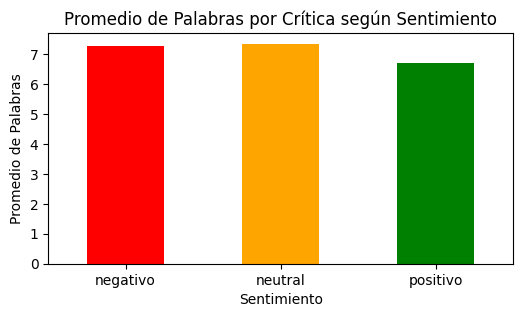

In [151]:
# Graficar el promedio de palabras por sentimiento
promedio_palabras = df_supplements.groupby('Sentimiento')['longitud_palabras'].mean()

# Graficarlo
promedio_palabras.plot(kind='bar', color=['red','orange','green'],figsize=(6,3))
plt.title('Promedio de Palabras por Crítica según Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Promedio de Palabras')
plt.xticks(rotation=0)
plt.show()


Analizar las críticas más cortas y más largas en relación al sentimiento (Top 10 de cada una)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html


In [152]:
# Críticas más cortas (top 10)
criticas_cortas = df_supplements.nsmallest(10, 'longitud_palabras')
print("Críticas más cortas (top 10):")
print(criticas_cortas[['Texto', 'longitud_palabras', 'Sentimiento']])

Críticas más cortas (top 10):
                                     Texto  longitud_palabras Sentimiento
20       Excelente relación calidad-precio                  3    positivo
206      Excelente relación precio-calidad                  3    positivo
86               Todo perfecto, sin quejas                  4    positivo
96           Producto promedio, no destaca                  4     neutral
158         Producto increíble, me encanta                  4    positivo
233    Excelente atención, muy profesional                  4    positivo
242           Todo perfecto, lo recomiendo                  4    positivo
262         Me causó molestias estomacales                  4    negativo
24          El envío tomó demasiado tiempo                  5    negativo
41   Excelente sabor, estoy muy satisfecho                  5    positivo


In [153]:
# Críticas más largas (top 10)
criticas_largas = df_supplements.nlargest(10, 'longitud_palabras')
print("\nCríticas más largas (top 10):")
print(criticas_largas[['Texto', 'longitud_palabras', 'Sentimiento']])


Críticas más largas (top 10):
                                                 Texto  longitud_palabras  \
88   El sabor no está mal, pero no lo volvería a co...                 11   
263   El sabor no es lo que esperaba, pero no está mal                 11   
14    El tiempo de envío fue más rápido de lo esperado                 10   
21       La textura del producto es rara y no me gustó                 10   
134       El precio es un poco alto, pero vale la pena                 10   
180  El paquete llegó con un golpe, pero estaba tod...                 10   
203          El sabor es muy dulce, no es de mi agrado                 10   
205  El paquete llegó bien, aunque tardó más de lo ...                 10   
217   Me generó dolor de cabeza, no lo volveré a tomar                 10   
224     Creo que el precio es justo para lo que ofrece                 10   

    Sentimiento  
88      neutral  
263     neutral  
14     positivo  
21     negativo  
134     neutral  
180     neutr

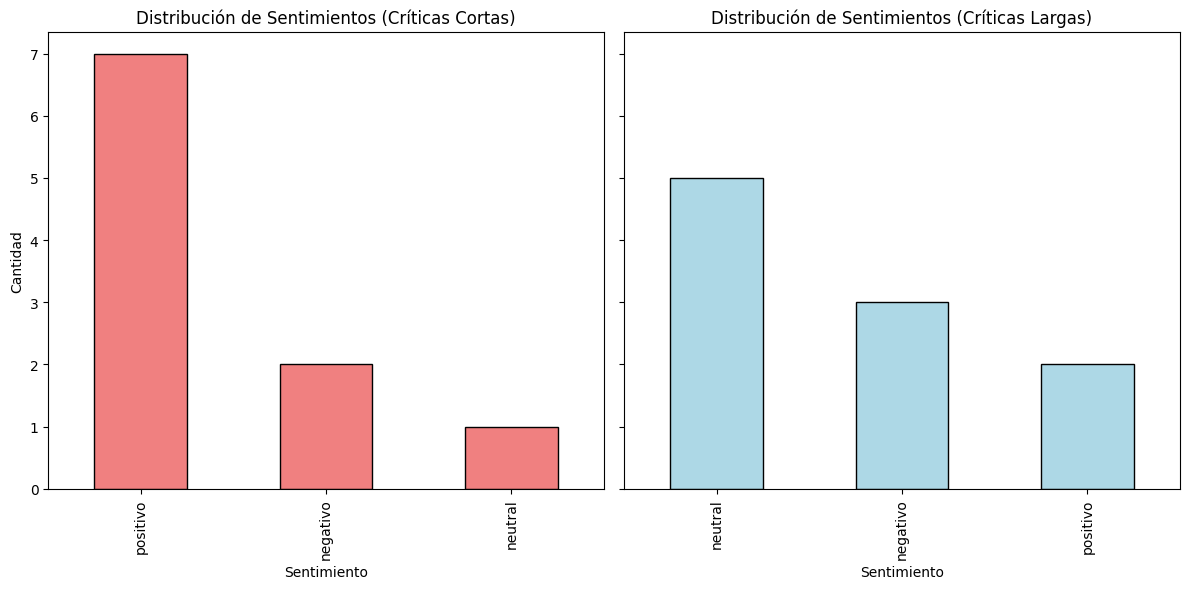

In [154]:
# Creo una figura con dos gráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Distribución de sentimientos en críticas cortas
criticas_cortas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightcoral', ax=axs[0], edgecolor='black')

# Etiqueta y titulo del primer gráfico (Criticas cortas)
axs[0].set_title('Distribución de Sentimientos (Críticas Cortas)')
axs[0].set_xlabel('Sentimiento')
axs[0].set_ylabel('Cantidad')

# Distribución de sentimientos en críticas largas
criticas_largas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightblue', ax=axs[1], edgecolor='black')

# Título del segundo gráfico (Criticas largas)
axs[1].set_title('Distribución de Sentimientos (Críticas Largas)')
axs[1].set_xlabel('Sentimiento')

plt.tight_layout()
plt.show()

A simple vista se puede ver como las críticas más cortas tienen una tendencia de ser positivas.
Y las críticas más largas tienen una tendencia de ser neutrales.

---
# Preprocesamiento de Texto

Realizo el preprocesamiento del texto previo al analisis final, Feature Engineering y modelado.
Con el fin de evitar redundancias a la hora de hacer un Word Cloud pero sobre todo hacerlo un texto procesable para el feature engineering posterior y el modelado.

1. `Normalización` (Minúsculas, elimino puntuaciones y caracteres especiales (dejo las tildes, ñ, números y espacios porque considero que puede ser significativo en español).
2. Elimino `stopwords` que no generan un valor semántico.
3.  `Lematización`: Reduzco las palabras a su base para evitar duplicar términos que tengan un significado similar semanticamente

La `Tokenización` la realizaré directo con el modelo "multilingual-e5-large"



In [155]:
# Limpieza y normalización del texto para realizar el Word Cloud

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para limpiar y procesar el texto
def clean(texto):
    # Convertir a minúscula
    texto = texto.lower()

    # Eliminar puntuaciones y caracteres especiales
    texto = re.sub(r'[^a-záéíóúüñ0-9\s]+', '', texto)

    # Eliminar stopwords
    tokens = [word for word in texto.split() if word not in stopwords.words('spanish')]

    # Lematización
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir las palabras lematizadas en un texto limpio
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Aplicar la función de limpieza al DataFrame
df_supplements['Texto_Limpio'] = df_supplements['Texto'].apply(clean)


In [156]:
df_supplements.head()

,Texto,Sentimiento,longitud_palabras,Texto_Limpio
0,"El sabor es increíble, lo mejor que he probado",positivo,9,sabor increíble mejor probado
1,Llegó tarde y el paquete estaba dañado,negativo,7,llegó tarde paquete dañado
2,El precio es razonable para la calidad,positivo,7,precio razonable calidad
3,No noto diferencia con otros productos similares,neutral,7,noto diferencia productos similares
4,El envío fue rápido y sin problemas,positivo,7,envío rápido problemas


`WordCloud`
---

Visualización de las palabras más frecuentes (cualitativamente).
A simple vista son las principales palabras. :
- Sabor
- Producto
- Precio
- Calidad
- Servicio
- llego
- rapido

Entiendo que va de la mano con el desbalance positivo de los comentarios.

A simple vista pareciera que el producto es el principal eje de los comentarios y que el precio, el sabor y la velocidad son las variables más comentadas por los clientes.

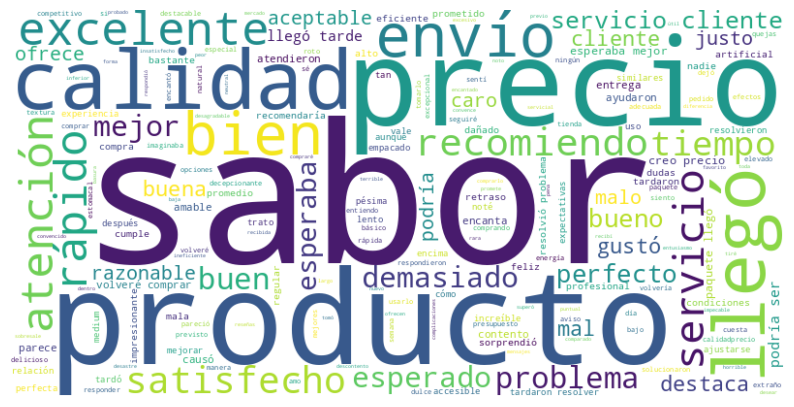

In [157]:
# Wordcloud para visualizar las palabras más frecuentes en los comentarios de los usuarios

# Lista para almacenar todos los textos limpios
texto_completo = " ".join(df_supplements['Texto_Limpio'])

# Generación del WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar la imagen del WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' para suavizar la imagen
plt.axis('off')  # Quitar los ejes
plt.show()

`CounterVectorizer`
---

En este caso quiero ver de manera cuantitativa y más detallada la misma repetición.

Voy a analizar el top 10 de palabras más frecuentas.

De esta manera voy a buscar complementar la Word Cloud con esta herramienta.

Analizando el gráfico refuerzo la idea anterior, eje de los comentarios "Producto" y variables principales "Sabor", "Precio", "Entrega" y "Atención"

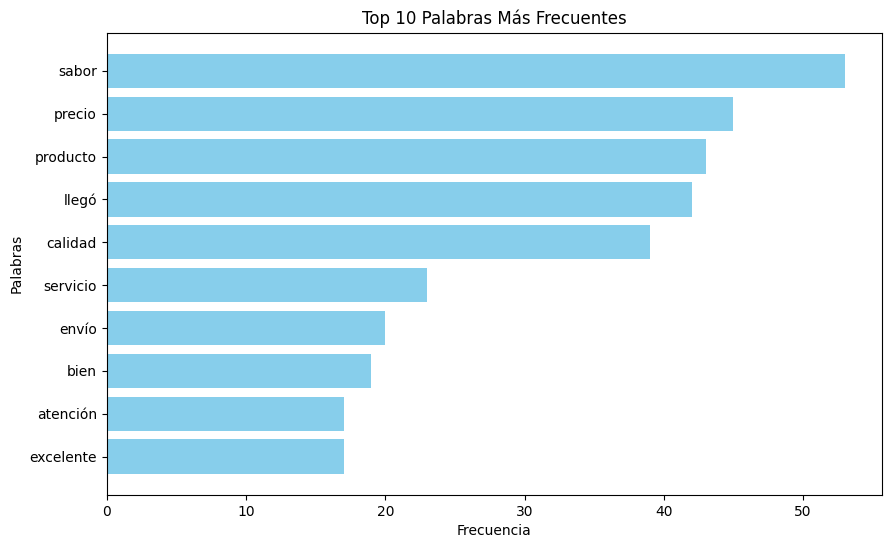

In [158]:
# CountVectorizer para complementar el ánalisis de las palabras más frecuentes

# Inicializar el CountVectorizer
vectorizer = CountVectorizer(max_features=10)

# Aplicar el vectorizer al texto completo
X = vectorizer.fit_transform([texto_completo])

# Obtener las palabras y sus frecuencias
palabras = vectorizer.get_feature_names_out()
frecuencias = X.toarray().sum(axis=0)

# Crear un DataFrame para visualizar las palabras más frecuentes
df_palabras = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})

# Ordenar el DataFrame por frecuencia en orden descendente
df_palabras = df_palabras.sort_values(by='Frecuencia', ascending=False)

# Visualizar las top 10 palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(df_palabras['Palabra'], df_palabras['Frecuencia'], color='skyblue')
plt.title('Top 10 Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.gca().invert_yaxis()  # Para que la palabra más frecuente esté arriba
plt.show()


# Feature Engineering

El objetivo de esta sección es transformar el texto para que pueda ser interpretado por los algoritmos de ML que voy a usar posteriormente.

NLP Representation

`Embedding Models`
---

Me va a permitir representar el texto en un espacio numerico. A diferencia de métodos más clásicos como TF-IDF que captura la frecuencia de palabras, los embedings me van a permitir capturar representaciones densas del texto que incluyen relaciones tanto semánticas como contextuales entre palabras.

Esto va a ser fundamental a la hora de aplicar los modelos de ML, ya que va a permitir que comprendan no solo las palabras individuales, sino el contexto general de las oraciones.

Voy a utilizar el tokenizador y el modelo de HuggingFace (intfloat/multilingual-e5-large)para obtener los embeddings de las frases ya que es un modelo open-source que soporta distintos lenguajes especializado en texto semantico.

In [159]:
# Embedding Models

# Cargar el modelo y tokenizer desde HuggingFace
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large")
model = AutoModel.from_pretrained("intfloat/multilingual-e5-large")

# Función para obtener embeddings
def get_embedding(text):
    # Tokenizar la oración
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Obtener el embedding de la oración
    with torch.no_grad():
        embedding = model(**inputs).last_hidden_state.mean(dim=1)

    return embedding.squeeze().numpy()

# Aplicar la función a la columna 'Texto_Limpio' de tu DataFrame
df_supplements['Embedding'] = df_supplements['Texto_Limpio'].apply(get_embedding)

# Ver el DataFrame con embeddings
print(df_supplements[['Texto_Limpio', 'Embedding']])

                            Texto_Limpio  \
0          sabor increíble mejor probado   
1             llegó tarde paquete dañado   
2               precio razonable calidad   
3    noto diferencia productos similares   
4                 envío rápido problemas   
..                                   ...   
294                 siento vitalidad uso   
295  excelente calidad vale cada centavo   
296         sabor aceptable sorprendente   
297           problemas atención cliente   
298              llegó tiempo confiables   

                                             Embedding  
0    [0.37949297, 0.018278519, -0.31692043, -1.4277...  
1    [0.29728043, 0.10108301, 0.2544717, -1.0751157...  
2    [0.3472688, -0.25522107, -0.34541056, -1.44136...  
3    [0.602626, -0.63015354, -0.7458455, -0.9598028...  
4    [0.10878301, -0.04230996, 0.18203694, -0.80993...  
..                                                 ...  
294  [0.47435722, -0.29000342, -0.79885054, -0.9351...  
295  [0.6868878

`t-SNE Reducción de Dimensionalidad`
---

El obtetivo es crear un mapa reducido e 2D para visualizar e interpretar los embeddings realizados en el paso previo a través de t-SNE.

- n_components = Elegí 2 componentes para reducir los embeddings a un plano 2D, para facilitar la visualización.
- Perplexity: Tomo un valor medio dado que se recomienda 5-15 para enfocar en relaciones locales y 50 a 100 para dar prioridad a patrones globales.
- random_state = 42 para permitir la reproducibilidad



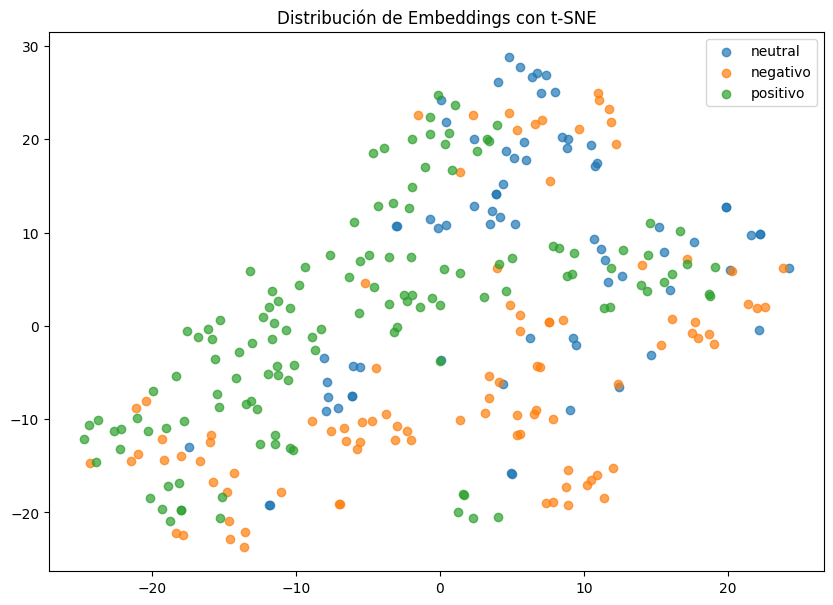

In [160]:
# Visualización 2D de los embeddings

# Extraer los embeddings (asegúrate de convertirlos a una matriz NumPy)
embeddings = np.vstack(df_supplements['Embedding'])

labels = df_supplements['Sentimiento']

# Aplicar t-SNE para reducir dimensiones
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 7))
for cluster in set(labels):
    idx = labels == cluster
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=f'{cluster}', alpha=0.7)

plt.title("Distribución de Embeddings con t-SNE")
plt.legend()
plt.show()


A simple vista percibo un aceptable agrupamiento de las críticas `positivas`.

Indica que las expresiones positivas tienen una representación semántica distintiva en el espacio de embeddings.

Los puntos `negativos` también tienen a formar grupos aunque aparecen globalmente un poco más dispersos que los positivos.

Los `neutrales` estan más intercalados entre los dos grupos, lo que podría hablar de cierta ambiguedad de las críticas a nivel semántico.

`Calculo la matriz de distancias `
---

Realizo el cálculo de distancias entre los puntos en el espacio 2D generado por t-SNE con el objetivo de analizar que tan cerca o lejos están entre sí las observaciones.

**Pairwise_distances**: Se utiliza en este caso para calcular la distiancia entre cada par de puntos en el espacio 2D generado previamente.
Me crea una matriz de distancias utilizando metrica Euclidiana.

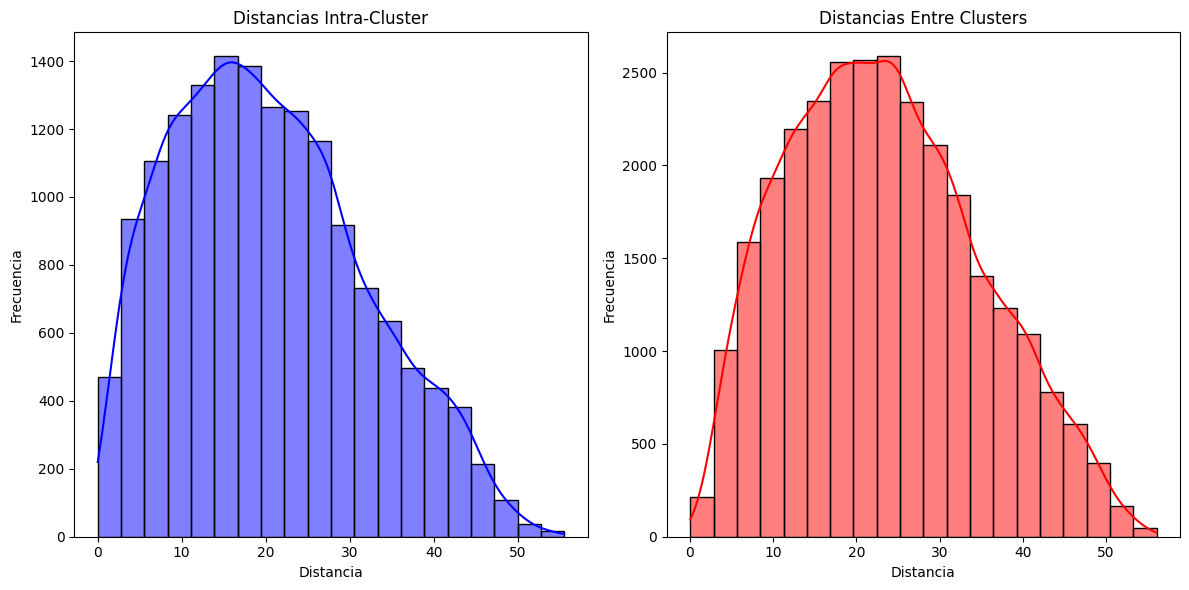

In [161]:
# Creo una matriz de distancias entre todos los puntos
distance_matrix = pairwise_distances(embeddings_2d)

# Crear máscaras para distancias intra-cluster y entre clusters
intra_distances = []
inter_distances = []

# Se itera sobre las distancias y dependiendo si pertenece al mismo cluster o a diferentes clusters se agregan a dicha lista.
for i, label_i in enumerate(labels):
    for j, label_j in enumerate(labels):
        if i < j:  # Evitar duplicar cálculos
        # Si los puntos pertenecen al mismo cluster se agregan a la lista intra
            if label_i == label_j:
                intra_distances.append(distance_matrix[i, j])
        # Sino se agregan a la lista inter
            else:
                inter_distances.append(distance_matrix[i, j])

# Visualizar histogramas
plt.figure(figsize=(12, 6))

# Histogramas de distancias intra-cluster
plt.subplot(1, 2, 1)
sns.histplot(intra_distances, kde=True, color='blue', bins=20)
plt.title('Distancias Intra-Cluster')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Histogramas de distancias entre clusters
plt.subplot(1, 2, 2)
sns.histplot(inter_distances, kde=True, color='red', bins=20)
plt.title('Distancias Entre Clusters')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


- Distancias intra-cluster: Las distancias entre los puntos de una misma etiqueta tiene un pico entre 10 y 20. Lo interpreto como algo positivo ya que sugiere que los puntos dentro del mismo grupo están semánticamente cercanos.

- Distancias inter-cluster: La separación entre los diferentes grupos tiene un pico en el rango de 10 a 30, por encima de las distancias intra cluster.
No es muy grande pero lo considero aceptable.


# ETAPA 1: Modelado Predictivo

`Clasificación de Sentimiento (Sentimental Classification)`
---

Research inicial:
- https://towardsdatascience.com/a-guide-to-text-classification-and-sentiment-analysis-2ab021796317
- https://cookbook.openai.com/examples/classification_using_embeddings

Para esta etapa voy a utilizar modelos eficientes y a la vez accesibles en cualquier tipo de entorno para la clasificación de sentimientos.

https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
https://www.geeksforgeeks.org/support-vector-machine-algorithm/
https://www.geeksforgeeks.org/support-vector-machine-algorithm/

Principalmente voy a probar:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)

Tienen una buena capacidad para manejar datos de alta dimensionalidad como embeddings y como ventaja no requieren mucha capacidad computacional.

Como problematicas que puedan surgir en primera instancia se me ocurren los analizados en la etapa de EDA:

- Desbalanceo de clases: Hay más positivos que neutrales y negativos.
En ese caso habrá que evaluar undersampling o oversampling.

`Preparación del df para trabajar los modelos` `Código en línea`
---

In [162]:
label_encoder = LabelEncoder()
df_supplements['Sentimiento'] = label_encoder.fit_transform(df_supplements['Sentimiento'])

In [163]:
# Verificar la columna de Sentimiento
print(df_supplements['Sentimiento'].unique())  # Asegúrate de que las etiquetas son correctas


[2 0 1]


In [170]:
# Preparo el df
X = np.vstack(df_supplements['Embedding'].values)
y = df_supplements[["Sentimiento"]].values

# Divido los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


`Modelos: Finalmente utilizo Logistic Regression`
---

Logistic Regression

In [171]:
# Crear y entrenar el modelo de regresión logística
model_lr = LogisticRegression(max_iter=1000, class_weight="balanced")
model_lr.fit(X_train, y_train)

# Evaluar el modelo
y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.86      0.75      0.80        16
           2       0.83      0.91      0.87        22

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



Random Forest

In [172]:
# Creo y entreno el modelo de Random Forest
# Entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.80      0.50      0.62        16
           2       0.72      0.95      0.82        22

    accuracy                           0.75        60
   macro avg       0.76      0.73      0.73        60
weighted avg       0.76      0.75      0.74        60



Suppor Vector Machine (SVM)

In [173]:
# Crear y entrenar el modelo de SVM
model_svm = SVC(kernel='linear', random_state=42)  # Puedes probar otros kernels si lo deseas (por ejemplo, 'rbf', 'poly')
model_svm.fit(X_train, y_train)

# Evaluar el modelo
y_pred_svm = model_svm.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.92      0.69      0.79        16
           2       0.80      0.91      0.85        22

    accuracy                           0.80        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.81      0.80      0.80        60



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


`Metricas de Performance para clasificación`
---
`La precision`: Mide qué tan confiables son las predicciones positivas realizadas por el modelo. Indica la proporción de predicciones positivas que son realmente correctas.  

Regresión Logistica:
- Clase 0 (Negativo): 0.76
- Clase 1 (Neutral): 0.86
- Clase 2 (Positivo): 0.80

Random Forest:
- Clase 0 (Negativo): 0.76
- Clase 1 (Neutral): 0.80
- Clase 2 (Positivo): 0.72

SVM:
- Clase 0 (Negativo): 0.74
- Clase 1 (Neutral): 0.92
- Clase 2 (Positivo): 0.80

La precisión es bastante alta y similar en los 3 modelos.
"neutral" es la clase que mejor precisión tiene y "Negativo" es la que menor precisión tiene en general.
Un detalle es que Random forest tiene menor precisión en genetal.

---

`El recall : Mide la capacidad del modelo para identificar correctamente todos los casos positivos reales. Indica cuántos de los positivos reales fueron detectados.

Regresión Logistica:
- Clase 0 (Negativo): 0.73
- Clase 1 (Neutral): 0.75
- Clase 2 (Positivo): 0.91

Random Forest:
- Clase 0 (Negativo): 0.73
- Clase 1 (Neutral): 0.50
- Clase 2 (Positivo): 0.95

SVM:
- Clase 0 (Negativo): 0.77
- Clase 1 (Neutral): 0.69
- Clase 2 (Positivo): 0.91

El recall de la clase "Positiva" tiene un excelente desempeño.
En la clase "Neutral" es donde se presenta la mayor diferencia y el menor desempeño sobre todo en Random Forest.

---

`El F1-Score `: Combina **precision** y **recall** en una única métrica. Es útil cuando las clases están desbalanceadas.
En mi caso estan un tanto desbalanceadas por lo cual le voy a dar prioridad.

Regresión Logistica:
- Clase 0 (Negativo): 0.74
- Clase 1 (Neutral): 0.80
- Clase 2 (Negativo): 0.85

Random Forest:
- Clase 0 (Negativo): 0.74
- Clase 1 (Neutral): 0.62
- Clase 2 (Negativo): 0.82

SVM:
- Clase 0 (Negativo): 0.76
- Clase 1 (Neutral): 0.79
- Clase 2 (Negativo): 0.85

El que mejor valores presenta es el modelo de regresión Logistica en terminos generales.
Al ser un dataset un tanto desbalanceado voy a tomar la decisión de utilizar Regresión Logistica como modelo final.

Descarto random forest por los valores de la clase neutral.

`Matriz de Confusión`
---

Accuracy: 0.8166666666666667


<ipython-input-174-e9ecf50f3df4>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajusta los márgenes para evitar que los títulos se corten


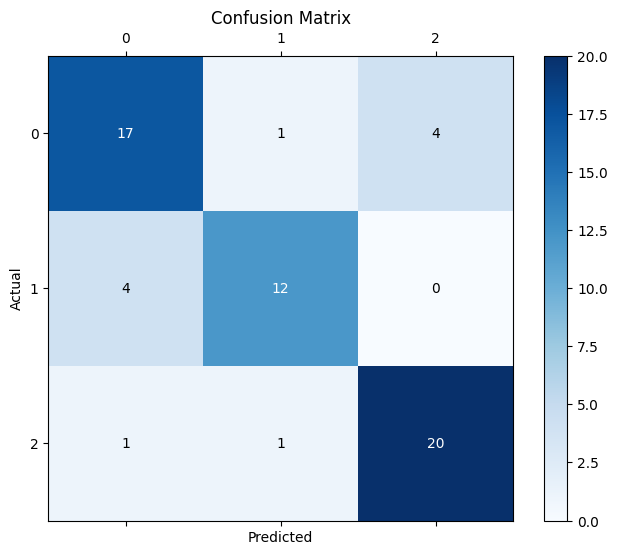

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))  # Tamaño ajustado para mejor visualización
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)  # `fignum=1` mantiene la figura
plt.colorbar()
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

# Añadir los valores a la matriz visualizada
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}',
                 ha='center',
                 va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta los márgenes para evitar que los títulos se corten
plt.show()


Aca visualizo un poco como funciona el modelo.

**Sentimiento Negativo:** 16 se predijeron correctamente como negativas y 6 incorrectas (5 de esas como positivo, eso me preocupa)

**Sentimiento Neutral:** 12 fueron correctamente identificadas y 4 como algo negativo.

**Sentimiento Positivo:** 20 fueron correctas y 2 incorrectas.

Se ve naturalmente que la predicción positiva son las que mejor predicción tienen en el modelo.
Se puede deber a que hay mayor cantidad de positivas en el dataset original.

In [169]:
# Probe realizar Oversampling y no hubo grandes modificaciones por lo cual lo mantengo como estaba

`Modelado de Topico (Clustering)`
---

- https://www.geeksforgeeks.org/topic-modeling-using-latent-dirichlet-allocation-lda/
- https://medium.com/@daffabercerita/how-to-use-large-language-model-for-topic-modeling-a-comprehensive-guide-6c03d365cc90
- https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a
- https://www.geeksforgeeks.org/topic-modeling-using-latent-dirichlet-allocation-lda/

Para trabajar la clasificación no supervisada de tematicas voy a utilizar LDA (Latent Dirichlet Allocation).

K-Means es otra opción, sin embargo no tengo un número de temas predefinido de ante mano para trabajar y tampoco considero que cada review hable de un solo tema.

Por lo tanto considero que LDA, puede enriquecer el ánalisis previo al uso de LLM.


In [ ]:
# Asegúrate de que los embeddings estén en formato de matriz NumPy
embeddings = np.vstack(df_supplements['Embedding'].values)

from sklearn.decomposition import PCA

# Reducir la dimensionalidad de los embeddings a 50 componentes
pca = PCA(n_components=50, random_state=42)
embeddings_reduced = pca.fit_transform(embeddings)



# ETAPA 2: IA GENERATIVA